# Data processing
In the following code, the data will be read.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Reading the data
df = pd.read_csv('dataset/politifact.csv')

#Checking the data size
df.shape

(14209, 4)

In [2]:
#Get the first 5 dsata
df.head(5)

,statement,source,link,veracity
0,"Sen. Kamala Harris is ""supporting the animals ...",Donald Trump,/web/20180705082623/https://www.politifact.com...,Pants on Fire!
1,"Says Ronald Reagan said immigrants ""brought wi...",Becoming American Initiative,/web/20180705082623/https://www.politifact.com...,Mostly True
2,"Says Democratic Senators ""demand Supreme Court...",Viral image,/web/20180705082623/https://www.politifact.com...,Pants on Fire!
3,"""Tim Kaine doesn’t want a border at all. He wa...",Corey Stewart,/web/20180705082623/https://www.politifact.com...,Pants on Fire!
4,"""There are a lot of private charters. And in f...",Kelda Helen Roys,/web/20180705082623/https://www.politifact.com...,Half-True


In [3]:
#Find the unique value in column.
df.veracity.unique()

array(['Pants on Fire!', 'Mostly True', 'Half-True', 'False', 'True',
       'Mostly False', 'Full Flop', 'Half Flip', 'No Flip'], dtype=object)

In [4]:
# Removing non-sense data
# "Pants on Fire", "Full Flop", "Half Flip", "No Flip" because it is nonsense category
# "Mostly True", "Half-true", "Mostly False" because it is not concrete

df_clean = df[~df['veracity'].isin(["Pants on Fire!", "Full Flop","Half Flip", "No Flip", "Mostly True", "Half-True", "Mostly False"])]
df_clean.head(5)

,statement,source,link,veracity
7,"""Watch those GDP numbers. We started off at a ...",Donald Trump,/web/20180705082623/https://www.politifact.com...,False
8,"""The European Union … they send us Mercedes, t...",Donald Trump,/web/20180705082623/https://www.politifact.com...,False
9,"""Clinton campaign official arrested by FBI on ...",Bloggers,/web/20180705082623/https://www.politifact.com...,False
10,"""Our courts find that 80 percent of those who ...",Jeff Sessions,/web/20180705082623/https://www.politifact.com...,False
11,Says a progressive income tax proposal from De...,Evelyn Sanguinetti,/web/20180705082623/https://www.politifact.com...,False


In [5]:
#Binarizing clean dataset
df_bin = df_clean.replace({
    "False" : 0,
    "True" : 1
})

df_bin.tail(5)

,statement,source,link,veracity
14200,"""I'm for a three-state political solution in I...",Sam Brownback,/web/20180119180622/http://www.politifact.com/...,1
14204,"""For every single scientist that tells you (gl...",Tom Tancredo,/web/20180119180622/http://www.politifact.com/...,0
14206,"""We now have the greatest income inequality si...",John Edwards,/web/20180119180622/http://www.politifact.com/...,1
14207,"""Tommy Thompson is the father of welfare refor...",Tommy Thompson,/web/20180119180622/http://www.politifact.com/...,1
14208,"""Tommy Thompson created the first school choic...",Tommy Thompson,/web/20180119180622/http://www.politifact.com/...,1


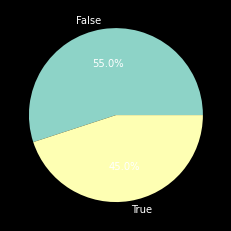

In [6]:
# Draw the pie chart
plt.pie([df_bin.veracity.value_counts()[0], df_bin.veracity.value_counts()[1]], labels=df_clean.veracity.unique().tolist(), autopct='%1.1f%%')
plt.show()

In [7]:
# Save the cleaned data
df_bin.to_csv("dataset/politifact_clean_binarized.csv", index=False)

In [10]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

df_bin["tokens"] = df_bin["statement"].apply(tokenizer.tokenize)
df_bin.head()

,statement,source,link,veracity,tokens
7,"""Watch those GDP numbers. We started off at a ...",Donald Trump,/web/20180705082623/https://www.politifact.com...,0,"[Watch, those, GDP, numbers, We, started, off,..."
8,"""The European Union … they send us Mercedes, t...",Donald Trump,/web/20180705082623/https://www.politifact.com...,0,"[The, European, Union, they, send, us, Mercede..."
9,"""Clinton campaign official arrested by FBI on ...",Bloggers,/web/20180705082623/https://www.politifact.com...,0,"[Clinton, campaign, official, arrested, by, FB..."
10,"""Our courts find that 80 percent of those who ...",Jeff Sessions,/web/20180705082623/https://www.politifact.com...,0,"[Our, courts, find, that, 80, percent, of, tho..."
11,Says a progressive income tax proposal from De...,Evelyn Sanguinetti,/web/20180705082623/https://www.politifact.com...,0,"[Says, a, progressive, income, tax, proposal, ..."


In [11]:
df_bin.to_csv("dataset/politifact_clean_binarized_tokenized.csv", index=False)